## Image recognition - [From here](https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71)

In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import webcolors as wc

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (2076, 1767, 3)


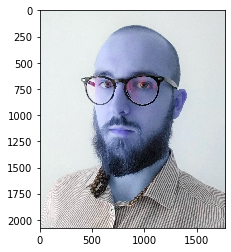

In [2]:
image = cv2.imread('Daniel1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

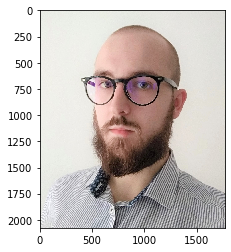

In [3]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [7]:

'''gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)
'''

"gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\nplt.imshow(gray_image, cmap='gray')"

In [4]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [5]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [141]:
def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return hex_colors
#can also put rgb_colors up

In [136]:
first = get_colors(get_image('colors.jpg'), 4, True)
second = get_colors(get_image('Daniel1.jpg'), 4, True)

In [137]:
first

['#ea1d25', '#c4fe0e', '#4047cb', '#f2f2f2']

In [138]:
first[0]

'#ea1d25'

In [127]:
def get_approx_color(hex_color):
    orig = wc.hex_to_rgb(hex_color)
    similarity = {}
    for hex_code, color_name in wc.css3_hex_to_names.items():
        approx = wc.hex_to_rgb(hex_code)
        similarity[color_name] = sum(np.subtract(orig, approx) ** 2)
    return min(similarity, key=similarity.get)

def get_color_name(hex_color):
    try:
        return wc.hex_to_name(hex_color)
    except ValueError:
        return get_approx_color(hex_color)

In [128]:
for color in second:

    print(get_approx_color(color))

gainsboro
darkslategrey
grey
darkgrey


In [130]:
for color in first:

    print(get_color_name(color))

whitesmoke
crimson
royalblue
greenyellow


In [142]:
"""
second = get_colors(get_image('Daniel1.jpg'), 4, True)
for color in second:

    print(get_color_name(color))"""

images =['Daniel1.jpg','colors.jpg']
topcolors = []
for image in images:
    colors = get_colors(get_image(image), 5, False)
    for color in colors:
        topcolors.append(get_color_name(color))

In [144]:
print(topcolors)

['darkgrey', 'gainsboro', 'darkslategrey', 'dimgrey', 'grey', 'white', 'crimson', 'royalblue', 'greenyellow', 'silver']
